In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np
labels = ['alif','yay']
img_size =50 # need to be set
#data_dir='training'

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        print(class_num)
        for img in os.listdir(path):
                img_arr = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                _,img_arr=cv2.threshold(img_arr,200,255,cv2.THRESH_BINARY)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
    return np.array(data,dtype=object)

train = get_data('training')
val = get_data('validation')

x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)


x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

#x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

#x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

for x in x_train:
    print(x[20])

0
1
0
1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.74901961 0.45098039 0.14901961 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[0.36078431 0.36078431 0.36078431 0.44313725 0.55686275 0.6745098
 0.78823529 0.90588235 0.98823529 0.92156863 0.85882353 0.79215686
 0.72941176 0.6627451  0.56862745 0.45490196 0.3372549  0.22352941
 0.10980392 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0

In [18]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(50,50,1)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 50, 50, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)        

In [19]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [20]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500


C:\Users\RNS\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 0.6552 - accuracy: 0.7241 - val_loss: 0.6947 - val_accuracy: 0.4286
Epoch 2/500
1/1 [==============================] - 0s 167ms/step - loss: 0.6608 - accuracy: 0.6897 - val_loss: 0.6946 - val_accuracy: 0.4286
Epoch 3/500
1/1 [==============================] - 0s 161ms/step - loss: 0.6562 - accuracy: 0.7586 - val_loss: 0.6946 - val_accuracy: 0.4286
Epoch 4/500
1/1 [==============================] - 0s 177ms/step - loss: 0.6609 - accuracy: 0.7586 - val_loss: 0.6945 - val_accuracy: 0.4286
Epoch 5/500
1/1 [==============================] - 0s 167ms/step - loss: 0.6597 - accuracy: 0.8621 - val_loss: 0.6945 - val_accuracy: 0.4286
Epoch 6/500
1/1 [==============================] - 0s 158ms/step - loss: 0.6551 - accuracy: 0.7931 - val_loss: 0.6944 - val_accuracy: 0.4286
Epoch 7/500
1/1 [==============================] - 0s 158ms/step - loss: 0.6601 - accuracy: 0.7241 - val_loss: 0.6944 - val_accuracy: 0.4286
Epoch 8/500
1/1 [===========

Epoch 59/500
1/1 [==============================] - 0s 172ms/step - loss: 0.6496 - accuracy: 0.8621 - val_loss: 0.6923 - val_accuracy: 0.4286
Epoch 60/500
1/1 [==============================] - 0s 163ms/step - loss: 0.6414 - accuracy: 0.8276 - val_loss: 0.6923 - val_accuracy: 0.4286
Epoch 61/500
1/1 [==============================] - 0s 181ms/step - loss: 0.6408 - accuracy: 0.8966 - val_loss: 0.6923 - val_accuracy: 0.4286
Epoch 62/500
1/1 [==============================] - 0s 167ms/step - loss: 0.6437 - accuracy: 0.8966 - val_loss: 0.6922 - val_accuracy: 0.4286
Epoch 63/500
1/1 [==============================] - 0s 161ms/step - loss: 0.6466 - accuracy: 0.8621 - val_loss: 0.6922 - val_accuracy: 0.4286
Epoch 64/500
1/1 [==============================] - 0s 158ms/step - loss: 0.6448 - accuracy: 0.7931 - val_loss: 0.6921 - val_accuracy: 0.4286
Epoch 65/500
1/1 [==============================] - 0s 169ms/step - loss: 0.6447 - accuracy: 0.7931 - val_loss: 0.6921 - val_accuracy: 0.4286
Epoch 

1/1 [==============================] - 0s 191ms/step - loss: 0.6327 - accuracy: 0.8966 - val_loss: 0.6902 - val_accuracy: 0.4286
Epoch 117/500
1/1 [==============================] - 0s 189ms/step - loss: 0.6352 - accuracy: 0.8621 - val_loss: 0.6902 - val_accuracy: 0.4286
Epoch 118/500
1/1 [==============================] - 0s 176ms/step - loss: 0.6229 - accuracy: 0.8621 - val_loss: 0.6901 - val_accuracy: 0.4286
Epoch 119/500
1/1 [==============================] - 0s 181ms/step - loss: 0.6368 - accuracy: 0.8276 - val_loss: 0.6901 - val_accuracy: 0.4286
Epoch 120/500
1/1 [==============================] - 0s 168ms/step - loss: 0.6259 - accuracy: 0.8621 - val_loss: 0.6901 - val_accuracy: 0.4286
Epoch 121/500
1/1 [==============================] - 0s 175ms/step - loss: 0.6382 - accuracy: 0.7931 - val_loss: 0.6900 - val_accuracy: 0.4286
Epoch 122/500
1/1 [==============================] - 0s 165ms/step - loss: 0.6445 - accuracy: 0.8621 - val_loss: 0.6900 - val_accuracy: 0.4286
Epoch 123/500

1/1 [==============================] - 0s 153ms/step - loss: 0.6178 - accuracy: 0.8966 - val_loss: 0.6882 - val_accuracy: 0.4286
Epoch 174/500
1/1 [==============================] - 0s 172ms/step - loss: 0.6306 - accuracy: 0.8276 - val_loss: 0.6882 - val_accuracy: 0.4286
Epoch 175/500
1/1 [==============================] - 0s 157ms/step - loss: 0.6208 - accuracy: 0.8621 - val_loss: 0.6882 - val_accuracy: 0.4286
Epoch 176/500
1/1 [==============================] - 0s 146ms/step - loss: 0.6120 - accuracy: 0.9310 - val_loss: 0.6881 - val_accuracy: 0.4286
Epoch 177/500
1/1 [==============================] - 0s 146ms/step - loss: 0.6089 - accuracy: 0.9310 - val_loss: 0.6881 - val_accuracy: 0.4286
Epoch 178/500
1/1 [==============================] - 0s 159ms/step - loss: 0.6203 - accuracy: 0.8966 - val_loss: 0.6881 - val_accuracy: 0.4286
Epoch 179/500
1/1 [==============================] - 0s 160ms/step - loss: 0.6255 - accuracy: 0.8966 - val_loss: 0.6880 - val_accuracy: 0.4286
Epoch 180/500

1/1 [==============================] - 0s 175ms/step - loss: 0.5965 - accuracy: 0.8966 - val_loss: 0.6865 - val_accuracy: 0.4286
Epoch 231/500
1/1 [==============================] - 0s 174ms/step - loss: 0.6000 - accuracy: 0.8966 - val_loss: 0.6865 - val_accuracy: 0.4286
Epoch 232/500
1/1 [==============================] - 0s 167ms/step - loss: 0.6082 - accuracy: 0.8966 - val_loss: 0.6864 - val_accuracy: 0.4286
Epoch 233/500
1/1 [==============================] - 0s 157ms/step - loss: 0.6054 - accuracy: 0.8966 - val_loss: 0.6864 - val_accuracy: 0.4286
Epoch 234/500
1/1 [==============================] - 0s 166ms/step - loss: 0.6011 - accuracy: 0.8966 - val_loss: 0.6864 - val_accuracy: 0.4286
Epoch 235/500
1/1 [==============================] - 0s 164ms/step - loss: 0.5977 - accuracy: 0.9310 - val_loss: 0.6864 - val_accuracy: 0.4286
Epoch 236/500
1/1 [==============================] - 0s 162ms/step - loss: 0.5965 - accuracy: 0.8966 - val_loss: 0.6863 - val_accuracy: 0.4286
Epoch 237/500

1/1 [==============================] - 0s 154ms/step - loss: 0.5969 - accuracy: 0.8621 - val_loss: 0.6850 - val_accuracy: 0.4286
Epoch 288/500
1/1 [==============================] - 0s 152ms/step - loss: 0.5951 - accuracy: 0.8966 - val_loss: 0.6849 - val_accuracy: 0.4286
Epoch 289/500
1/1 [==============================] - 0s 155ms/step - loss: 0.5910 - accuracy: 0.8621 - val_loss: 0.6849 - val_accuracy: 0.4286
Epoch 290/500
1/1 [==============================] - 0s 153ms/step - loss: 0.5895 - accuracy: 0.9310 - val_loss: 0.6849 - val_accuracy: 0.4286
Epoch 291/500
1/1 [==============================] - 0s 169ms/step - loss: 0.5958 - accuracy: 0.8966 - val_loss: 0.6849 - val_accuracy: 0.4286
Epoch 292/500
1/1 [==============================] - 0s 152ms/step - loss: 0.5868 - accuracy: 0.9310 - val_loss: 0.6848 - val_accuracy: 0.4286
Epoch 293/500
1/1 [==============================] - 0s 153ms/step - loss: 0.5858 - accuracy: 0.8966 - val_loss: 0.6848 - val_accuracy: 0.4286
Epoch 294/500

1/1 [==============================] - 0s 181ms/step - loss: 0.5670 - accuracy: 0.9310 - val_loss: 0.6836 - val_accuracy: 0.4286
Epoch 345/500
1/1 [==============================] - 0s 170ms/step - loss: 0.5754 - accuracy: 0.8621 - val_loss: 0.6836 - val_accuracy: 0.4286
Epoch 346/500
1/1 [==============================] - 0s 164ms/step - loss: 0.5724 - accuracy: 0.8621 - val_loss: 0.6836 - val_accuracy: 0.4286
Epoch 347/500
1/1 [==============================] - 0s 174ms/step - loss: 0.5750 - accuracy: 0.9655 - val_loss: 0.6836 - val_accuracy: 0.4286
Epoch 348/500
1/1 [==============================] - 0s 152ms/step - loss: 0.5733 - accuracy: 0.8966 - val_loss: 0.6835 - val_accuracy: 0.4286
Epoch 349/500
1/1 [==============================] - 0s 150ms/step - loss: 0.5796 - accuracy: 0.8621 - val_loss: 0.6835 - val_accuracy: 0.4286
Epoch 350/500
1/1 [==============================] - 0s 148ms/step - loss: 0.5799 - accuracy: 0.8966 - val_loss: 0.6835 - val_accuracy: 0.4286
Epoch 351/500

1/1 [==============================] - 0s 165ms/step - loss: 0.5693 - accuracy: 0.8966 - val_loss: 0.6824 - val_accuracy: 0.4286
Epoch 402/500
1/1 [==============================] - 0s 177ms/step - loss: 0.5620 - accuracy: 0.8966 - val_loss: 0.6824 - val_accuracy: 0.4286
Epoch 403/500
1/1 [==============================] - 0s 165ms/step - loss: 0.5713 - accuracy: 0.8966 - val_loss: 0.6824 - val_accuracy: 0.4286
Epoch 404/500
1/1 [==============================] - 0s 159ms/step - loss: 0.5622 - accuracy: 0.8966 - val_loss: 0.6824 - val_accuracy: 0.4286
Epoch 405/500
1/1 [==============================] - 0s 153ms/step - loss: 0.5631 - accuracy: 0.8621 - val_loss: 0.6824 - val_accuracy: 0.4286
Epoch 406/500
1/1 [==============================] - 0s 154ms/step - loss: 0.5563 - accuracy: 0.9310 - val_loss: 0.6823 - val_accuracy: 0.4286
Epoch 407/500
1/1 [==============================] - 0s 161ms/step - loss: 0.5657 - accuracy: 0.8621 - val_loss: 0.6823 - val_accuracy: 0.4286
Epoch 408/500

1/1 [==============================] - 0s 145ms/step - loss: 0.5463 - accuracy: 0.8966 - val_loss: 0.6814 - val_accuracy: 0.4286
Epoch 459/500
1/1 [==============================] - 0s 154ms/step - loss: 0.5357 - accuracy: 0.8966 - val_loss: 0.6814 - val_accuracy: 0.4286
Epoch 460/500
1/1 [==============================] - 0s 147ms/step - loss: 0.5515 - accuracy: 0.8966 - val_loss: 0.6814 - val_accuracy: 0.4286
Epoch 461/500
1/1 [==============================] - 0s 162ms/step - loss: 0.5376 - accuracy: 0.8966 - val_loss: 0.6814 - val_accuracy: 0.4286
Epoch 462/500
1/1 [==============================] - 0s 156ms/step - loss: 0.5354 - accuracy: 0.8966 - val_loss: 0.6813 - val_accuracy: 0.4286
Epoch 463/500
1/1 [==============================] - 0s 146ms/step - loss: 0.5554 - accuracy: 0.8621 - val_loss: 0.6813 - val_accuracy: 0.4286
Epoch 464/500
1/1 [==============================] - 0s 145ms/step - loss: 0.5507 - accuracy: 0.8966 - val_loss: 0.6813 - val_accuracy: 0.4286
Epoch 465/500

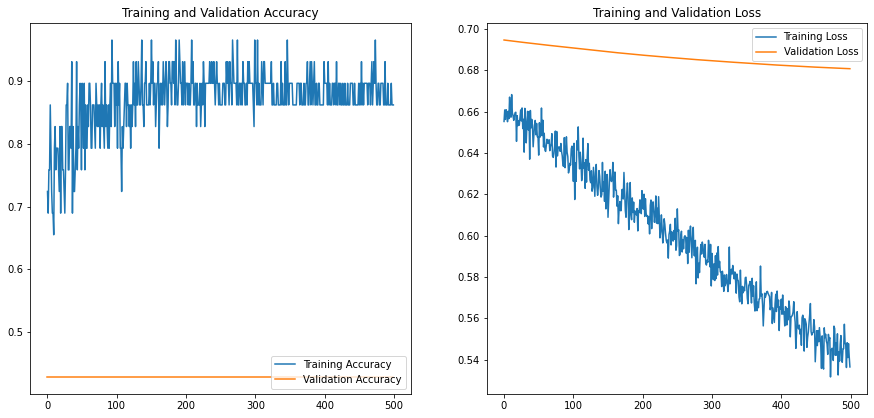

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
predictions = model.predict(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['alif (Class 0)','yay (Class 1)']))

ValueError: Found input variables with inconsistent numbers of samples: [7, 14]

In [32]:
predict_x=model.predict(x_val) 
predict_x=np.argmax(predict_x,axis=1)

In [33]:
print(classification_report(predict_x,y_val))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.43      0.60         7

    accuracy                           0.43         7
   macro avg       0.50      0.21      0.30         7
weighted avg       1.00      0.43      0.60         7



C:\Users\RNS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RNS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\RNS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
